In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
from glob import glob
review_data = glob('../json_csv_files/review_data/final_review/*')

total = pd.DataFrame() #빈 데이터프레임 하나를 생성한다

for file_name in review_data:
    temp = pd.read_csv(file_name, encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
    total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

reviews = total['리뷰']

name = []
member_id = []
rating = []
title_content = []
help = []
date = []

for star in reviews:
    star = eval(star)
    for r in star:
        for review in r:
            name.append(review[0])
            member_id.append(review[1])
            if review[2] == '5':
                rating.append(3)
            elif review[2] == '4':
                rating.append(2)
            else:
                rating.append(1)
            title_content.append(str(review[3]) + ' ' + str(review[4]))
            help.append(review[5])
            date.append(review[6])

df = pd.DataFrame(
    {'리뷰어 이름': name,
     '리뷰어 멤버 id': member_id,
     '별점': rating,
     '리뷰 내용': title_content,
     '리뷰로부터 도움 받은 사람 수': help,
     '리뷰 작성일자': date},
)
df
# df.to_csv('../json_csv_files/review_data/review_dataframe.csv', index=False, encoding="utf-8-sig")

,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자
0,리뷰호랭이,6596881,3,우리 아기의 우아한 우유 시간 [육아템 리뷰] 그로미미 PPSU 젖병 - 우리 아기...,,2023.12.20
1,노랑파라랑,113798723,3,젖병 유목민 그로미미로 정착!! ●내 돈 내산 찐 후 기 ● ✔구매동기 아...,7,2023.10.31
2,이*주,1393693,3,젖병은 그로미미! “내돈내산 후기 입니다” 둘째 아이가 이제 20개월이 다 ...,,2023.11.23
3,조블리맘,138148,3,"✔️ 구입후기 * PPSU 체리쉬 젖병 300ml 트윈 2p, 로즈골드, 노꼭지...",5,2023.04.26
4,정*원,108155907,3,용량이 커서 좋아요 10개월차 둘째아이를 키우는 연년생 엄마입니다~ 첫째때는 워낙...,11,2023.04.15
...,...,...,...,...,...,...
36475,김*형,41068525,1,고기가 구웠을때 너무 질겨요,,2022.04.19
36476,김*경,25796068,1,제껀 상한게 온건가 비린맛 우유 썩은맛 한입 먹고 버림,,2021.12.27
36477,박*은,106570045,1,와 이게 일등급이라고여? 진짜 소고기 너무 좋아해서 한달에 열번은 먹는데 이렇게 질...,,2023.12.28
36478,조*선,137304121,1,별로임 부모님 시켜드렸는데 양이 너무 적고 누가 한쪽은 먹고 남은 것 같다고 다시는...,3,2022.01.07


In [5]:
import pandas as pd
from glob import glob
review_data = glob('../json_csv_files/review_data/total.csv')

total = pd.DataFrame() #빈 데이터프레임 하나를 생성한다

for file_name in review_data:
    temp = pd.read_csv(file_name, encoding='utf-8') #csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
    total = pd.concat([total, temp]) #전체 데이터프레임에 추가하여 넣는다

reviews = total['리뷰']

name = []
member_id = []
rating = []
title_content = []
help = []
date = []

for star in reviews:
    star = eval(star)
    for r in star:
        for review in r:
            name.append(review[0])
            member_id.append(review[1])
            if review[2] == '5':
                rating.append(3)
            elif review[2] == '4':
                rating.append(2)
            else:
                rating.append(1)
            title_content.append(str(review[3]) + ' ' + str(review[4]))
            help.append(review[5])
            date.append(review[6])

df2 = pd.DataFrame(
    {'리뷰어 이름': name,
     '리뷰어 멤버 id': member_id,
     '별점': rating,
     '리뷰 내용': title_content,
     '리뷰로부터 도움 받은 사람 수': help,
     '리뷰 작성일자': date},
)
df2
# df.to_csv('../json_csv_files/review_data/review_dataframe.csv', index=False, encoding="utf-8-sig")

,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자
0,뿌링맛,122739143,3,"내돈내산 후회안함 구매가격 : 549,000 주문날짜 : 23.10.22 쿠팡로켓...",66,2023.10.23
1,이*현,78562760,3,만족합니다. 오래된 노트북 이사하면서 어디 부딛히기라도 했는지 갑자기 않돼서 발품팔...,14,2023.12.22
2,조*수,4725839,3,사무용으로 좋아요!! 디자인도 예쁨>_< 집에서 재택으로 일하는 30대입니다 그냥 ...,23,2023.12.01
3,김*준,105326680,3,"삼성전자 2021 노트북 플러스2 15.6, 퓨어 화이트는 전원 어댑터와 연결 ...",25,2023.11.02
4,김*아,60714665,3,개인용 사무용으로좋습니다 집에서 사용하던 데스크탑이 갑자기 고장이 나서 급하게 쿠팡...,21,2023.09.28
...,...,...,...,...,...,...
50153,김*경,122725714,1,새 제품을 샀는데 이렇게 오는게 맞나요? 아무리 물류센터에서 던지면서 운반 된다고...,8,2022.12.04
50154,최*용,119253707,1,전력약함,,2023.09.19
50155,샘도아,125262418,1,콘센트가 한번에 팍 고정되는 느낌이 아니라 이리저리 흔들려서 충전이 됐다 안됐다 하네요ㅠ,1,2023.06.03
50156,장*민,111333135,1,삼일째 쓰고 있는데 한구는 고장이네요 제일 끝에 있는 데는 불도 안나오고 전기도 안...,,2023.12.16


In [6]:
review_data = pd.read_csv('../json_csv_files/review_data/oph_total.csv')
review_data2 = pd.read_csv('../json_csv_files/review_data/df3/bct_review.csv', encoding='utf-8')
df = pd.concat([df, df2, review_data, review_data2])
df = df.reset_index()
df
# df.to_csv('../json_csv_files/review_data/final_review_dataframe.csv', index=False, encoding="utf-8-sig")

,index,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자
0,0,리뷰호랭이,6596881,3,우리 아기의 우아한 우유 시간 [육아템 리뷰] 그로미미 PPSU 젖병 - 우리 아기...,,2023.12.20
1,1,노랑파라랑,113798723,3,젖병 유목민 그로미미로 정착!! ●내 돈 내산 찐 후 기 ● ✔구매동기 아...,7,2023.10.31
2,2,이*주,1393693,3,젖병은 그로미미! “내돈내산 후기 입니다” 둘째 아이가 이제 20개월이 다 ...,,2023.11.23
3,3,조블리맘,138148,3,"✔️ 구입후기 * PPSU 체리쉬 젖병 300ml 트윈 2p, 로즈골드, 노꼭지...",5,2023.04.26
4,4,정*원,108155907,3,용량이 커서 좋아요 10개월차 둘째아이를 키우는 연년생 엄마입니다~ 첫째때는 워낙...,11,2023.04.15
...,...,...,...,...,...,...,...
133712,23323,임*경,154706780,1,포장상태가.. 나중에 사용하려고 미리 주문을 했긴한데.. 제목그대로 .. 포장상태가...,NaN,2023.08.28
133713,23324,양*현,39637864,1,박스도 구겨져서 오고 후기가 좋아 구매했는데 치발기 케이스에 기스가 왕창........,2.0,2022.08.19
133714,23325,박*정,107383571,1,물품파손 세이지색치발기 구입했다 반품등록했더니 리뷰쓸수 없어서 여기에 올립니다. 상...,7.0,2021.09.26
133715,23326,김*지,109205458,1,상품의 질이나 서비스가 너무 안좋네요 사용하다가 케이스가 너무 쉽게 이음세부분이 망...,1.0,2021.11.16


In [322]:
# 별점-1
df['별점'] = df['별점']-1
df.head(3)

,index,리뷰어 이름,리뷰어 멤버 id,별점,리뷰 내용,리뷰로부터 도움 받은 사람 수,리뷰 작성일자
0,0,리뷰호랭이,6596881,2,우리 아기의 우아한 우유 시간 [육아템 리뷰] 그로미미 PPSU 젖병 - 우리 아기...,,2023.12.20
1,1,노랑파라랑,113798723,2,젖병 유목민 그로미미로 정착!! ●내 돈 내산 찐 후 기 ● ✔구매동기 아...,7,2023.10.31
2,2,이*주,1393693,2,젖병은 그로미미! “내돈내산 후기 입니다” 둘째 아이가 이제 20개월이 다 ...,,2023.11.23


In [323]:
len(df)

133717

In [324]:
df = df.drop('리뷰어 이름', axis=1)
df = df.drop('리뷰로부터 도움 받은 사람 수', axis=1)
df = df.drop('리뷰 작성일자', axis=1)
df = df.drop('리뷰어 멤버 id', axis=1)

In [325]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [326]:
print('훈련샘플의개수:', len(train_data))
print('테스트 샘플의 개수:', len(test_data))

훈련샘플의개수: 106973
테스트 샘플의 개수: 26744


In [327]:
train_data.head()

,index,별점,리뷰 내용
87874,1236,1,좋은 상품저렴하게 살수 있어 좋지만 배송은 엉망 본인이 드실거라면 추천 선물할거면 ...
70381,33901,0,연마제 어떻게 제거 해야하나요..ㅠ 기름으로 닦아내는데 작은 구멍에서 계속 묻어나와...
30220,30220,2,깊은맛이 느껴지는게 맛있어요 굿굿 ~^^ ⭕제품명 : 샘표 맑은 조선 간장 ⭕개당 ...
37609,1129,0,픽셀 불량 스트레스 동일 제품 사용하다 실수로 모니터 망가져 재구입 하지만 기존 제...
37407,927,1,아이폰만 고집하는 아이가 14를 3%카드할인 받으려고 내가 와우 가입해서 대신 주문해줌


1. 중복확인

In [328]:
train_data['리뷰 내용'].nunique(), train_data['별점'].nunique()
# 5946 중 4609만 unique하다

(94927, 3)

In [329]:
train_data.drop_duplicates(subset=['리뷰 내용'], inplace=True)
print('총 샘플의 수 : ', len(train_data))

총 샘플의 수 :  94927


<Axes: >

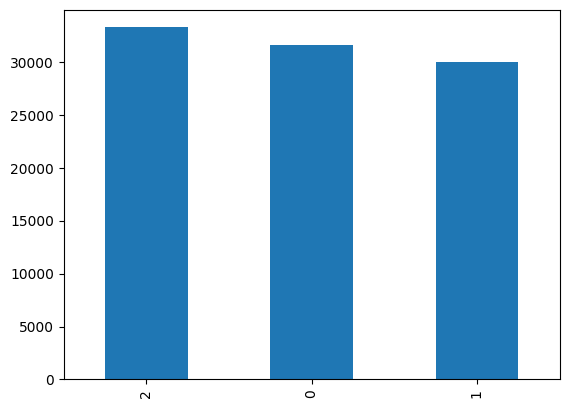

In [330]:
train_data['별점'].value_counts().plot(kind='bar')

In [331]:
train_data.groupby('별점').size().reset_index(name='count')

,별점,count
0,0,31612
1,1,30037
2,2,33278


2. 결측치 확인

In [332]:
# 결측치 확인
print(train_data.isnull().values.any())

False


In [333]:
train_data.isnull().sum()

index    0
별점       0
리뷰 내용    0
dtype: int64

In [334]:
print(len(train_data))

94927


3. 문자 전처리

In [335]:
import re
def temp(review):
    return re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

In [336]:
train_data['리뷰 내용'][:5].apply(temp)

87874     좋은 상품저렴하게 살수 있어 좋지만 배송은 엉망 본인이 드실거라면 추천 선물할거면 비추
70381    연마제 어떻게 제거 해야하나요ㅠ 기름으로 닦아내는데 작은 구멍에서 계속 묻어나와요 ...
30220    깊은맛이 느껴지는게 맛있어요 굿굿  제품명  샘표 맑은 조선 간장 개당 용량수량  ...
37609    픽셀 불량 스트레스 동일 제품 사용하다 실수로 모니터 망가져 재구입 하지만 기존 제...
37407         아이폰만 고집하는 아이가 를 카드할인 받으려고 내가 와우 가입해서 대신 주문해줌
Name: 리뷰 내용, dtype: object

In [337]:
train_data['리뷰 내용'] = train_data['리뷰 내용'].apply(temp)

train_data[:5]

,index,별점,리뷰 내용
87874,1236,1,좋은 상품저렴하게 살수 있어 좋지만 배송은 엉망 본인이 드실거라면 추천 선물할거면 비추
70381,33901,0,연마제 어떻게 제거 해야하나요ㅠ 기름으로 닦아내는데 작은 구멍에서 계속 묻어나와요 ...
30220,30220,2,깊은맛이 느껴지는게 맛있어요 굿굿 제품명 샘표 맑은 조선 간장 개당 용량수량 ...
37609,1129,0,픽셀 불량 스트레스 동일 제품 사용하다 실수로 모니터 망가져 재구입 하지만 기존 제...
37407,927,1,아이폰만 고집하는 아이가 를 카드할인 받으려고 내가 와우 가입해서 대신 주문해줌


In [338]:
train_data['리뷰 내용'][:10]

87874      좋은 상품저렴하게 살수 있어 좋지만 배송은 엉망 본인이 드실거라면 추천 선물할거면 비추
70381     연마제 어떻게 제거 해야하나요ㅠ 기름으로 닦아내는데 작은 구멍에서 계속 묻어나와요 ...
30220     깊은맛이 느껴지는게 맛있어요 굿굿  제품명  샘표 맑은 조선 간장 개당 용량수량  ...
37609     픽셀 불량 스트레스 동일 제품 사용하다 실수로 모니터 망가져 재구입 하지만 기존 제...
37407          아이폰만 고집하는 아이가 를 카드할인 받으려고 내가 와우 가입해서 대신 주문해줌
115288    파손되서 왔습니다 ㅡㅡ 뭐죠 처음 구매했는데 뽁뽁이에는 흘러내려서 액 묻어있고 손잡...
72504      우와진짜 커요  사진이랑 리뷰랑보고는 적당한크기를 생각했는데 받아보고 놀람  왠만...
7478       일단 저는 좀 독특한 구매 동기가 있어요  베베숲 센서티브 물티슈라길래 주문을 했...
98776     깔끔한 디자인 그러나 불편한 속지 앨범 자체는 튼튼하고 좋아요 크기도 적당한 편인데...
84036     숨쉬기 편해요 크기 귀끈의 길이 착용감 호흡의 편리성 모두 만족합니다 특히 타마스크...
Name: 리뷰 내용, dtype: object

In [339]:
train_data.isnull().sum()

index    0
별점       0
리뷰 내용    0
dtype: int64

In [340]:
# 테스트데이터 전처리
test_data.drop_duplicates(subset = ['리뷰 내용'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data = test_data.dropna(how='any') # Null 값 제거
test_data['리뷰 내용'] = test_data['리뷰 내용'].apply(temp)
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 25902


In [341]:
#stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [342]:
stopwords = ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가',
              '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면',
              '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다',
              '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에',
              '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다',
              '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳',
              '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때',
              '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다',
              '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼',
              '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만',
              '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로', '바꾸어서 말하면', '바꾸어서 한다면', '만약',
              '그렇지않으면', '까악', '툭', '딱', '삐걱거리다', '보드득', '비걱거리다', '꽈당', '응당', '해야한다', '에 가서', '각', '각각', '여러분',
              '각종', '각자', '제각기', '하도록하다', '와', '과', '그러므로', '그래서', '고로', '한 까닭에', '하기 때문에', '거니와', '이지만', '대하여',
              '관하여', '관한', '과연', '실로', '아니나다를가', '생각한대로', '진짜로', '한적이있다', '하곤하였다', '하', '하하', '허허', '아하', '거바',
              '와', '오', '왜', '어째서', '무엇때문에', '어찌', '하겠는가', '무슨', '어디', '어느곳', '더군다나', '하물며', '더욱이는', '어느때', '언제',
              '야', '이봐', '어이', '여보시오', '흐흐', '흥', '휴', '헉헉', '헐떡헐떡', '영차', '여차', '어기여차', '끙끙', '아야', '앗', '아야', '콸콸',
              '졸졸', '좍좍', '뚝뚝', '주룩주룩', '솨', '우르르', '그래도', '또', '그리고', '바꾸어말하면', '바꾸어말하자면', '혹은', '혹시', '답다', '및',
              '그에 따르는', '때가 되어', '즉', '지든지', '설령', '가령', '하더라도', '할지라도', '일지라도', '지든지', '몇', '거의', '하마터면', '인젠',
              '이젠', '된바에야', '된이상', '만큼', '어찌됏든', '그위에', '게다가', '점에서 보아', '비추어 보아', '고려하면', '하게될것이다', '일것이다',
              '비교적', '좀', '보다더', '비하면', '시키다', '하게하다', '할만하다', '의해서', '연이서', '이어서', '잇따라', '뒤따라', '뒤이어', '결국',
              '의지하여', '기대여', '통하여', '자마자', '더욱더', '불구하고', '얼마든지', '마음대로', '주저하지 않고', '곧', '즉시', '바로', '당장',
              '하자마자', '밖에 안된다', '하면된다', '그래', '그렇지', '요컨대', '다시 말하자면', '바꿔 말하면', '즉', '구체적으로', '말하자면', '시작하여',
              '시초에', '이상', '허', '헉', '허걱', '바와같이', '해도좋다', '해도된다', '게다가', '더구나', '하물며', '와르르', '팍', '퍽', '펄렁', '동안',
              '이래', '하고있었다', '이었다', '에서', '로부터', '까지', '예하면', '했어요', '해요', '함께', '같이', '더불어','마저', '마저도', '양자',
              '모두', '습니다', '가까스로', '하려고하다', '즈음하여', '다른', '다른 방면으로', '해봐요', '습니까', '했어요', '말할것도 없고', '무릎쓰고',
              '개의치않고', '하는것만 못하다', '하는것이 낫다', '매', '매번', '들', '모', '어느것', '어느', '로써', '갖고말하자면', '어디', '어느쪽',
              '어느것', '어느해', '어느 년도', '라 해도', '언젠가', '어떤것', '어느것', '저기', '저쪽', '저것', '그때', '그럼', '그러면', '요만한걸',
              '그래', '그때', '저것만큼', '그저', '이르기까지', '할 줄 안다', '할 힘이 있다', '너', '너희', '당신', '어찌', '설마', '차라리', '할지언정',
              '할지라도', '할망정', '할지언정', '구토하다', '게우다', '토하다', '메쓰겁다', '옆사람', '퉤', '쳇', '의거하여', '근거하여', '의해', '따라',
              '힘입어', '그', '다음', '버금', '두번째로', '기타', '첫번째로', '나머지는', '그중에서', '견지에서', '형식으로 쓰여', '입장에서', '위해서',
              '단지', '의해되다', '하도록시키다', '뿐만아니라', '반대로', '전후', '전자', '앞의것', '잠시', '잠깐', '하면서', '그렇지만', '다음에',
              '그러한즉', '그런즉', '남들', '아무거나', '어찌하든지', '같다', '비슷하다', '예컨대', '이럴정도로', '어떻게', '만약', '만일',
              '위에서 서술한바와같이', '인 듯하다', '하지 않는다면', '만약에', '무엇', '무슨', '어느', '어떤', '아래윗', '조차', '한데', '그럼에도 불구하고',
              '여전히', '심지어', '까지도', '조차도', '하지 않도록', '않기 위하여', '때', '시각', '무렵', '시간', '동안', '어때', '어떠한', '하여금',
              '네', '예', '우선', '누구', '누가 알겠는가', '아무도', '줄은모른다', '줄은 몰랏다', '하는 김에', '겸사겸사', '하는바', '그런 까닭에',
              '한 이유는', '그러니', '그러니까', '때문에', '그', '너희', '그들', '너희들', '타인', '것', '것들', '너', '위하여', '공동으로', '동시에',
              '하기 위하여', '어찌하여', '무엇때문에', '붕붕', '윙윙', '나', '우리', '엉엉', '휘익', '윙윙', '오호', '아하', '어쨋든', '만 못하다',
              '하기보다는', '차라리', '하는 편이 낫다', '흐흐', '놀라다', '상대적으로 말하자면', '마치', '아니라면', '쉿', '그렇지 않으면', '그렇지 않다면',
              '안 그러면', '아니었다면', '하든지', '아니면', '이라면', '좋아', '알았어', '하는것도', '그만이다', '어쩔수 없다', '하나', '일', '일반적으로',
              '일단', '한켠으로는', '오자마자', '이렇게되면', '이와같다면', '전부', '한마디', '한항목', '근거로', '하기에', '아울러', '하지 않도록',
              '않기 위해서', '이르기까지', '이 되다', '로 인하여', '까닭으로', '이유만으로', '이로 인하여', '그래서', '이 때문에', '그러므로', '그런 까닭에',
              '알 수 있다', '결론을 낼 수 있다', '으로 인하여', '있다', '어떤것', '관계가 있다', '관련이 있다', '연관되다', '어떤것들', '에 대해', '이리하여',
              '그리하여', '여부', '하기보다는', '하느니', '하면 할수록', '운운', '이러이러하다', '하구나', '하도다', '다시말하면', '다음으로', '에 있다',
              '에 달려 있다', '우리', '우리들', '오히려', '하기는한데', '어떻게', '어떻해', '어찌됏어', '어때', '어째서', '본대로', '자', '이', '이쪽',
              '여기', '이것', '이번', '이렇게말하자면', '이런', '이러한', '이와 같은', '요만큼', '요만한 것', '얼마 안 되는 것', '이만큼', '이 정도의',
              '이렇게 많은 것', '이와 같다', '이때', '이렇구나', '것과 같이', '끼익', '삐걱', '따위', '와 같은 사람들', '부류의 사람들', '왜냐하면',
              '중의하나', '오직', '오로지', '에 한하다', '하기만 하면', '도착하다', '까지 미치다', '도달하다', '정도에 이르다', '할 지경이다', '결과에 이르다',
              '관해서는', '여러분', '하고 있다', '한 후', '혼자', '자기', '자기집', '자신', '우에 종합한것과같이', '총적으로 보면', '총적으로 말하면',
              '총적으로', '대로 하다', '으로서', '참', '그만이다', '할 따름이다', '쿵', '탕탕', '쾅쾅', '둥둥', '봐', '봐라', '아이야', '아니', '와아',
              '응', '아이', '참나', '년', '월', '일', '령', '영', '일', '이', '삼', '사', '오', '육', '륙', '칠', '팔', '구', '이천육', '이천칠', '이천팔',
              '이천구', '하나', '둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영', 'ㅋㅋ', 'ㅜㅜ']

In [343]:
#stopwords = stopwords+st
len(stopwords)

679

4. 토픈화 및 stopwords 제거

In [630]:
okt = Okt()

In [554]:
X_train = []
for sentence in tqdm(train_data['리뷰 내용']):
    tok_sen = okt.pos(sentence, stem=True) # 형태소 추출
    stop_rm_tok = []
    for word, pos in tok_sen:
        if (not word in stopwords) and (len(word)!=1):
            stop_rm_tok.append(word)
    X_train.append(stop_rm_tok)

100%|███████████████████████| 94927/94927 [1:22:09<00:00, 19.26it/s]


In [629]:
X_train[:5]

array([[   0,    0,    0, ...,  168,    1,  778],
       [   0,    0,    0, ...,    1,  415,    2],
       [   0,    0,    0, ...,    4, 9934, 2833],
       [   0,    0,    0, ...,   56,   15,  656],
       [   0,    0,    0, ...,  598,   45,   85]])

In [559]:
test_data['리뷰 내용']

120697    포드 익스플로러 에어컨 필터 교체 잘 했습니다  돌비웨이  초미세먼지 차단 자동차 ...
3557      부드러운 칫솔모 안녕하세요 귀염둥이 살 살 남매를 키우는 엄마에요  저는 구매하기전...
92922                         배송어쩌죠 ㅠㅠ 이렇게는 말고 박스도 안전하게 플리즈
119559                           그 자리에 앉으면 향이 너무 쎄 머리가 아프다 
94828     강추합니다 깨끗하고 좋네요 너무 예뻐요 진열 겸 책장으로 쓸려고 구입 했는데 기대 ...
                                ...                        
11216                                      언제쯤 큰 효과를 볼까요 ㅋ 
16276     좋습니다 촉감이 부드러워서 좋아요 사이즈는 나쁘지 않아요 입어보자 마자 바로 또 주...
15777     내돈내산 박 일용 캐리어 반추천 박 일용 중간 사이즈의 캐리어가 없어서 이번에 일본...
50329     가성비 값 만원대무료배송에 이정도 퀄리티면 아주 만족합니다 기존 상품평이 너무 안좋...
41681       너무나도 빠른 배송 슬림한 디자인 냉장고      디자인     화이트톤 색상으...
Name: 리뷰 내용, Length: 25902, dtype: object

In [561]:
X_test = []
for sentence in tqdm(test_data['리뷰 내용']):
    tokenized_sentence = okt.pos(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = []
    for word, pos in tokenized_sentence:
        if (not word in stopwords) and (len(word)!=1):
            stopwords_removed_sentence.append(word)

    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████| 25902/25902 [19:22<00:00, 22.29it/s]


In [625]:
print('전처리 후 테스트용 샘플의 개수 :',len(X_test))
print('전처리 후 학습용 샘플의 개수 :',len(X_train))

전처리 후 테스트용 샘플의 개수 : 25902
전처리 후 학습용 샘플의 개수 : 94822


#### 토큰화 시간이 오래걸리므로 임시변수 저장

In [626]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [627]:
len(tokenizer.word_index)

0

5. 토큰화된 학습 데이터 활용 단어사전 생성
- keras Tokenizer() 활용

#### 단어의 등장빈도수를 활용해 등장빈도수가 낮은 단어들은 제거

In [628]:
tokenizer.word_counts.items()

odict_items([])

In [566]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0 # 단어의 빈도수가 threshold보다 작은 단어의 수
total_freq = 0 # 훈련데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장빈도수가 threshold보다 작은 단어들의 빈도수 합

In [567]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어 각각의 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [568]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 54476
등장 빈도가 2번 이하인 희귀 단어의 수: 30199
단어 집합에서 희귀 단어의 비율: 55.43542110287098
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.653198989582813


In [569]:
# 사용할 단어 수 결정
vocab_size = total_cnt - rare_cnt + 1
vocab_size # 단어의 출연 빈도수가 높은 (3번이상 나오는) 단어의 수
# 이만큼만 단어사전 생성

24278

In [570]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

In [572]:
# 단어의 등장 횟수가 3개보다 작은 단어들을 제거
filtered_word_counts = {word: count for word, count in tokenizer.word_counts.items() if count >= 3}

# Tokenizer 업데이트: 등장 횟수가 3개보다 작은 단어들이 제거된 상태로 업데이트
tokenizer.word_index = {word: idx for idx, (word, _) in enumerate(sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True), start=1)}
tokenizer.word_counts = filtered_word_counts

In [573]:
tokenizer.word_counts.items()

dict_items([('좋다', 93045), ('상품', 15169), ('저렴하다', 8174), ('살수', 137), ('있다', 100935), ('배송', 14244), ('엉망', 422), ('본인', 611), ('들다', 24369), ('추천', 9995), ('선물', 4745), ('하다', 287876), ('비추다', 1123), ('마제', 1196), ('어떻다', 3341), ('제거', 2693), ('기름', 2857), ('으로', 52427), ('닦다', 6141), ('작다', 10498), ('구멍', 1818), ('에서', 24933), ('계속', 6271), ('묻다', 2716), ('나오다', 11599), ('미치다', 614), ('쉬다', 5606), ('방법', 2263), ('깊다', 778), ('느껴지다', 3249), ('맛있다', 10488), ('굿굿', 423), ('제품', 41095), ('샘표', 117), ('맑은', 338), ('조선', 217), ('간장', 1050), ('개다', 1830), ('용량', 5014), ('수량', 507), ('가격', 23228), ('당원', 6), ('구매', 45939), ('날짜', 696), ('월일', 442), ('오후', 459), ('오전', 259), ('이유', 3482), ('사용', 52497), ('하고', 23549), ('미역국', 98), ('끓이다', 1954), ('마침', 683), ('떨어지다', 5566), ('검색', 2589), ('해보다', 11656), ('아니다', 21985), ('착하다', 1793), ('믿다', 3165), ('먹다', 49496), ('라서', 3628), ('망설이다', 658), ('없이', 9307), ('바로', 7851), ('후기', 17641), ('받다', 18153), ('넣다', 15949), ('보다', 65352), ('손가락', 727), 

In [574]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [575]:
# label 데이터 생성
y_train = np.array(train_data['별점'])
y_test = np.array(test_data['별점'])

In [576]:
print(len(X_train))
print(len(y_train))

94927
94927


In [577]:
print(X_train[:3])

[[3, 34, 87, 3683, 2, 3, 42, 1770, 1340, 19, 70, 168, 1, 778], [736, 264, 344, 1, 325, 8, 121, 65, 504, 18, 118, 340, 59, 1331, 142, 736, 344, 1, 415, 2], [1082, 273, 66, 1766, 13, 4052, 2074, 2791, 830, 501, 157, 1559, 21, 16401, 11, 1195, 1727, 1674, 42, 1195, 1727, 2485, 11, 255, 4052, 830, 157, 7, 20, 2, 4487, 472, 1, 1220, 144, 365, 57, 157, 24, 34, 3, 21, 513, 280, 9, 2, 4052, 242, 1262, 74, 93, 11, 1, 13, 30, 13, 27, 2074, 2791, 830, 4487, 32, 472, 4, 1082, 273, 1163, 8, 453, 9, 4, 155, 206, 89, 2092, 3294, 32, 921, 221, 4052, 18, 81, 2791, 830, 100, 66, 2791, 830, 1412, 558, 588, 922, 2949, 3145, 4583, 344, 6970, 2471, 262, 3, 2791, 830, 8, 207, 499, 12, 1210, 5, 2549, 11, 1, 9, 1, 13, 1525, 21, 2054, 116, 721, 70, 42, 1413, 889, 1, 1262, 1394, 34, 758, 44, 1369, 11, 889, 1, 50, 6, 50, 83, 1590, 113, 54, 1061, 241, 10, 287, 1598, 1, 262, 301, 277, 219, 8, 4, 9934, 2833]]


- 빈도수가 2 이하인 단어는 사전에서 제외했으므로
    - 빈도수 2 이하로만 이루어진 리뷰 문장은 sentence가 비게됨

In [578]:
drop_train = []
for index, sentence in enumerate(X_train):
    if len(sentence) < 1:
        drop_train.append(index)

drop_train
len(drop_train)

105

In [579]:
drop_test = []
for index, sentence in enumerate(X_test):
    if len(sentence) < 1:
        drop_test.append(index)

drop_test
len(drop_test)

29

In [580]:
# 리뷰 단어가 하나도 없어 제거될 리뷰 index
print(drop_train)

[262, 763, 2263, 2676, 3812, 4966, 5348, 5736, 7241, 7769, 8049, 8938, 12733, 12759, 13284, 13338, 16869, 17430, 17473, 17998, 20252, 21958, 23786, 24713, 25394, 25565, 26519, 29495, 30037, 30139, 30742, 31530, 32916, 34088, 35771, 36275, 37188, 38176, 38423, 38892, 39756, 40477, 40758, 41975, 42393, 43135, 43294, 44588, 47045, 48104, 49051, 51165, 51559, 52881, 53668, 53768, 54684, 55009, 55454, 55500, 56107, 56314, 57463, 58596, 58650, 59098, 60243, 61519, 62555, 63613, 64436, 64576, 64974, 66422, 66790, 68323, 69476, 72312, 72760, 74084, 74323, 74805, 76074, 77697, 77711, 78022, 78512, 78637, 78697, 79395, 79678, 79767, 80640, 82341, 82886, 83221, 83658, 84914, 85252, 85338, 87459, 89694, 90008, 92133, 94197]


In [581]:
len(drop_train)

105

In [582]:
# 해당 index 제거
X_train = np.delete(np.array(X_train, dtype=object), drop_train, axis=0).tolist()
y_train = np.delete(y_train, drop_train, axis=0)

In [583]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

94822
94822
25902
25902


### 패딩 수를 결정하기 위해
- 학습데이터 길이 확인

리뷰의 최대 길이 : 979
리뷰의 평균 길이 : 58.30792432136002


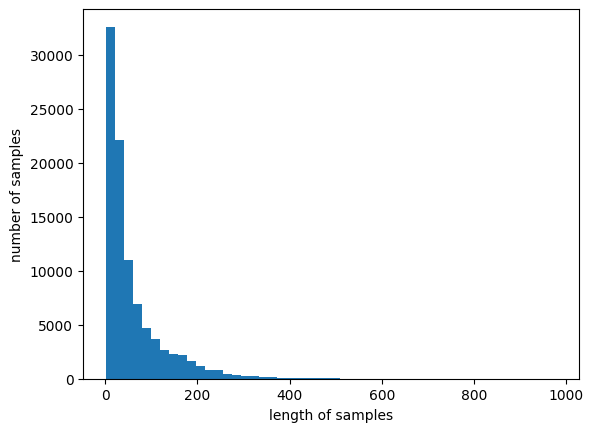

In [584]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 샘플의 길이차이가 많으므로 샘플 길이를 150으로 맞춤 //임의
- 샘플길이가 일정 수 이하인 비율 계산하는 함수 작성 후 확인하고 진행

In [585]:
# 샘플길이가 파라미터 max_len 이하인 샘플 비율 확인 함수
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [586]:
max_len = 300
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 98.76716373837296


In [587]:
# 전체 데이터의 길이는 130으로 맞춘다. 패딩 진행
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### 학습 데이터 전처리 완성

## 2. 딥러닝 모델 학습, 예측

In [588]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout, Bidirectional, SimpleRNN, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [589]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
#mc = ModelCheckpoint('./model/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [590]:
embedding_dim = 100 # 1개 단어에 대한 밀집벡터 사이즈
hidden_units = 100 # LSTM의 뉴런 수

In [604]:
partial_x_train, X_val, partial_y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## CNN

In [618]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, 256))
model_cnn.add(Conv1D(256, 3, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(256, 5, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(256, 7, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(layers.Dense(256, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.BatchNormalization())
model_cnn.add(layers.Dense(3, activation='softmax'))


In [619]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_cnn.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_71 (Embedding)    (None, None, 256)         6215168   
                                                                 
 conv1d_53 (Conv1D)          (None, None, 256)         196864    
                                                                 
 max_pooling1d_52 (MaxPooli  (None, None, 256)         0         
 ng1D)                                                           
                                                                 
 conv1d_54 (Conv1D)          (None, None, 256)         327936    
                                                                 
 max_pooling1d_53 (MaxPooli  (None, None, 256)         0         
 ng1D)                                                           
                                                                 
 conv1d_55 (Conv1D)          (None, None, 256)       

In [620]:
history_cnn = model_cnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
556/556 [==============================] - 1084s 2s/step - loss: 0.8121 - acc: 0.6237 - val_loss: 0.7154 - val_acc: 0.6757
Epoch 2/40
556/556 [==============================] - 1220s 2s/step - loss: 0.6556 - acc: 0.7115 - val_loss: 0.8323 - val_acc: 0.6512
Epoch 3/40
223/556 [===========>..................] - ETA: 12:21 - loss: 0.5112 - acc: 0.7870

KeyboardInterrupt: 

In [617]:
print("\n 테스트 정확도: %.4f" % (model_cnn.evaluate(X_test, y_test)[1]))

810/810 [==============================] - 34s 42ms/step - loss: 1.0780 - acc: 0.6870

 테스트 정확도: 0.6870


## LSTM

In [522]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 128))
model_lstm.add(LSTM(32, return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(32, return_sequences=True))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation='softmax'))

In [523]:
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_61 (Embedding)    (None, None, 128)         3248128   
                                                                 
 lstm_29 (LSTM)              (None, None, 32)          20608     
                                                                 
 dropout_47 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_30 (LSTM)              (None, None, 32)          8320      
                                                                 
 dropout_48 (Dropout)        (None, None, 32)          0         
                                                                 
 lstm_31 (LSTM)              (None, 16)                3136      
                                                                 
 dropout_49 (Dropout)        (None, 16)              

In [524]:
history = model_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
593/593 [==============================] - 570s 945ms/step - loss: 0.7915 - acc: 0.6385 - val_loss: 0.6971 - val_acc: 0.6901
Epoch 2/40
593/593 [==============================] - 586s 988ms/step - loss: 0.6656 - acc: 0.7168 - val_loss: 0.6761 - val_acc: 0.7042
Epoch 3/40
593/593 [==============================] - 566s 955ms/step - loss: 0.6032 - acc: 0.7517 - val_loss: 0.7015 - val_acc: 0.6974
Epoch 4/40
593/593 [==============================] - 587s 991ms/step - loss: 0.5452 - acc: 0.7819 - val_loss: 0.7392 - val_acc: 0.6891
Epoch 5/40
593/593 [==============================] - 577s 973ms/step - loss: 0.4833 - acc: 0.8125 - val_loss: 0.8037 - val_acc: 0.6896
Epoch 6/40
593/593 [==============================] - 559s 943ms/step - loss: 0.4266 - acc: 0.8413 - val_loss: 0.8748 - val_acc: 0.6829
Epoch 6: early stopping


In [525]:
print("\n 테스트 정확도: %.4f" % (model_lstm.evaluate(X_test, y_test)[1]))

810/810 [==============================] - 177s 218ms/step - loss: 0.7969 - acc: 0.7103

 테스트 정확도: 0.7103


## RNN

In [535]:
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, 128))
model_rnn.add(SimpleRNN(8, activation='relu'))
model_rnn.add(Dense(8, activation='relu'))
model_rnn.add(Dense(3, activation='softmax'))

In [536]:
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_rnn.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_64 (Embedding)    (None, None, 128)         3248128   
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, 8)                 1096      
                                                                 
 dense_75 (Dense)            (None, 8)                 72        
                                                                 
 dense_76 (Dense)            (None, 3)                 27        
                                                                 
Total params: 3249323 (12.40 MB)
Trainable params: 3249323 (12.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [537]:
history = model_rnn.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
593/593 [==============================] - 231s 385ms/step - loss: 0.8367 - acc: 0.6099 - val_loss: 0.7096 - val_acc: 0.6918
Epoch 2/40
593/593 [==============================] - 210s 354ms/step - loss: 0.6453 - acc: 0.7240 - val_loss: 0.6987 - val_acc: 0.6975
Epoch 3/40
593/593 [==============================] - 212s 357ms/step - loss: 0.5725 - acc: 0.7631 - val_loss: 0.7291 - val_acc: 0.6883
Epoch 4/40
593/593 [==============================] - 212s 358ms/step - loss: 0.5092 - acc: 0.7926 - val_loss: 0.7824 - val_acc: 0.6723
Epoch 5/40
593/593 [==============================] - 202s 340ms/step - loss: 0.4533 - acc: 0.8212 - val_loss: 0.8415 - val_acc: 0.6657
Epoch 6/40
593/593 [==============================] - 209s 352ms/step - loss: 0.4117 - acc: 0.8410 - val_loss: 0.8914 - val_acc: 0.6620
Epoch 6: early stopping


In [538]:
print("\n 테스트 정확도: %.4f" % (model_rnn.evaluate(X_test, y_test)[1]))

810/810 [==============================] - 28s 34ms/step - loss: 0.8085 - acc: 0.6954

 테스트 정확도: 0.6954


## Bi-LSTM

In [502]:
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(vocab_size, 128))
model_bi_lstm.add(Bidirectional(LSTM(128)))
model_bi_lstm.add(Dropout(0.5))
model_bi_lstm.add(Dense(3, activation='softmax'))

In [503]:
model_bi_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_bi_lstm.summary()

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_52 (Embedding)    (None, None, 128)         3248128   
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 dense_70 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3512067 (13.40 MB)
Trainable params: 3512067 (13.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [504]:
print(len(y_val[y_val == 0]))
print(len(y_val[y_val == 1]))
print(len(y_val[y_val == 2]))

6245
6026
6702


In [505]:
print(len(partial_y_train[partial_y_train == 0]))
print(len(partial_y_train[partial_y_train == 1]))
print(len(partial_y_train[partial_y_train == 2]))

25333
23985
26570


In [506]:
history = model_bi_lstm.fit(partial_x_train, partial_y_train, epochs=40, batch_size=128, callbacks=[es], validation_data=(X_val, y_val)) # train에서 0.2정도 빼서 test로

Epoch 1/40
593/593 [==============================] - 13762s 23s/step - loss: 0.7536 - acc: 0.6577 - val_loss: 0.7010 - val_acc: 0.6942
Epoch 2/40
 69/593 [==>...........................] - ETA: 2:54:02 - loss: 0.6265 - acc: 0.7369

KeyboardInterrupt: 

In [397]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

810/810 [==============================] - 18s 22ms/step - loss: 0.7454 - acc: 0.6902

 테스트 정확도: 0.6902


In [241]:
# # word_index 대신 tokenizer 객체 저장
# with open('tokenizer.pickle', 'wb') as handle :
#     pickle.dump(tokenizer, handle)

# with open('tokenizer.pickle', 'rb') as handle :
#     tokenizer = pickle.load(handle)

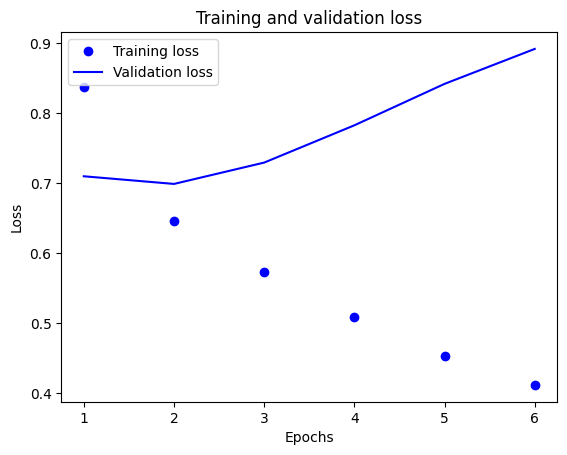

In [596]:
# 손실도 곡선
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

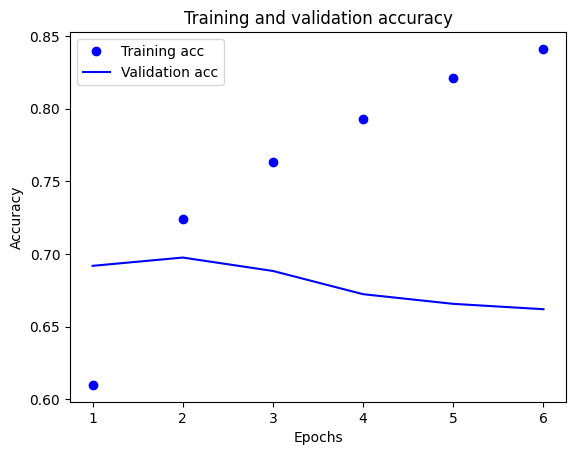

In [597]:
# 정확도 곡선
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [598]:
MAX_LENGTH = 150 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')

# 새로 입력된 문장을 전처리
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
print(sentence)

vector  = tokenizer.texts_to_sequences(sentence)
# vector = np.reshape(vector,(1,-1))
pad_new = pad_sequences([vector], maxlen = MAX_LENGTH, padding='post') # 패딩
# model = tf.keras.models.load_model('./model/review.h5')
# print(pad_new)
predictions = model.predict(pad_new)
print(predictions)

if np.argmax(predictions) == 2:
    print('좋음')
    print(predictions)
elif np.argmax(predictions) == 1:
    print('보통')
    print(predictions)
elif np.argmax(predictions) == 0:
    print('별로')
    print(predictions)

감성분석할 문장을 입력해 주세요.:  너무 좋다


['너무', '좋다']
1/1 [==============================] - 0s 79ms/step
[[ 0.8134462   0.16360559 -0.00141764]]
별로
[[ 0.8134462   0.16360559 -0.00141764]]
